In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

import keras
import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras import models
from matplotlib import cm

Using TensorFlow backend.


In [13]:
# model = load_model("models/4.ResNet-Model.h5")
# model.summary()

In [4]:
img_path = 'data/validation/BCC/hf_ISIC_0027865.jpg'

# We preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [44]:
import os
import glob
df_dir= "df"
test_images = glob.glob(os.path.join(df_dir, "*.jpg"))
test_images

['df/hf_ISIC_0026439.jpg', 'df/hf_ISIC_0025584.jpg']

In [5]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline


In [6]:
imageSize=224
train_dir = "data2/train/"
# validation_dir = 'data2/validation/'
# test_dir =  "data/test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['DF']:
                label = 0
            elif folderName in ['BCC']:
                label = 1
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3), mode='constant')
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
# X_val, y_val = get_data(validation_dir)
# X_test, y_test= get_data(test_dir)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2) 

from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 2)
# y_valHot = to_categorical(y_val, num_classes = 2)
# y_testHot = to_categorical(y_test, num_classes = 2)

100%|██████████| 7/7 [00:00<00:00, 84.45it/s]


/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Iteration: 1, named_losses: <zip object at 0x7fbaa796a4c8>, overall loss: 6470.9892578125
Iteration: 2, named_losses: <zip object at 0x7fbaa791b948>, overall loss: 3187.251220703125
Iteration: 3, named_losses: <zip object at 0x7fbaa796a0c8>, overall loss: 1659.513427734375
Iteration: 4, named_losses: <zip object at 0x7fbaa796a4c8>, overall loss: 845.1583862304688
Iteration: 5, named_losses: <zip object at 0x7fbaa7959ac8>, overall loss: 409.924072265625
Iteration: 6, named_losses: <zip object at 0x7fbaa797a048>, overall loss: 211.01087951660156
Iteration: 7, named_losses: <zip object at 0x7fbaa7959a88>, overall loss: 152.64022827148438
Iteration: 8, named_losses: <zip object at 0x7fbaa7959408>, overall loss: 107.11727142333984
Iteration: 9, named_losses: <zip object at 0x7fbaa79593c8>, overall loss: 81.2026138305664
Iteration: 10, named_losses: <zip object at 0x7fbaa7959148>, overall loss: 64.157958984375
Iteration: 11, named_losses: <zip object at 0x7fbaa794a0c8>, overall loss: 50.2996

Iteration: 89, named_losses: <zip object at 0x7fbaa79a82c8>, overall loss: -23.525157928466797
Iteration: 90, named_losses: <zip object at 0x7fbaa79b8148>, overall loss: -22.4598388671875
Iteration: 91, named_losses: <zip object at 0x7fbaa7aaab48>, overall loss: -26.324615478515625
Iteration: 92, named_losses: <zip object at 0x7fbaa79b86c8>, overall loss: -20.928760528564453
Iteration: 93, named_losses: <zip object at 0x7fbaa79a85c8>, overall loss: -25.217185974121094
Iteration: 94, named_losses: <zip object at 0x7fbaa79db4c8>, overall loss: -24.885242462158203
Iteration: 95, named_losses: <zip object at 0x7fbaa79a8048>, overall loss: -24.95608901977539
Iteration: 96, named_losses: <zip object at 0x7fbaa79dbe48>, overall loss: -24.91375732421875
Iteration: 97, named_losses: <zip object at 0x7fbaa79a8488>, overall loss: -26.894458770751953
Iteration: 98, named_losses: <zip object at 0x7fbaa79a87c8>, overall loss: -24.15927505493164
Iteration: 99, named_losses: <zip object at 0x7fbaa79db

Iteration: 175, named_losses: <zip object at 0x7fbaa79a8488>, overall loss: -35.15180206298828
Iteration: 176, named_losses: <zip object at 0x7fbaa79a87c8>, overall loss: -36.80464172363281
Iteration: 177, named_losses: <zip object at 0x7fbaa79db988>, overall loss: -37.234806060791016
Iteration: 178, named_losses: <zip object at 0x7fbaa79b8448>, overall loss: -34.45711135864258
Iteration: 179, named_losses: <zip object at 0x7fbaa7af8408>, overall loss: -36.15386199951172
Iteration: 180, named_losses: <zip object at 0x7fbaa79b8108>, overall loss: -36.106361389160156
Iteration: 181, named_losses: <zip object at 0x7fbaa7af8348>, overall loss: -37.96821594238281
Iteration: 182, named_losses: <zip object at 0x7fbaa7af8448>, overall loss: -34.854827880859375
Iteration: 183, named_losses: <zip object at 0x7fbaa79b8fc8>, overall loss: -37.63252639770508
Iteration: 184, named_losses: <zip object at 0x7fbaa79b8188>, overall loss: -36.65837478637695
Iteration: 185, named_losses: <zip object at 0x

/home/sara/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/sara/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


NameError: name 'visualize_cam' is not defined

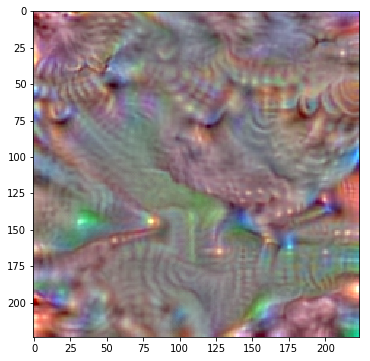

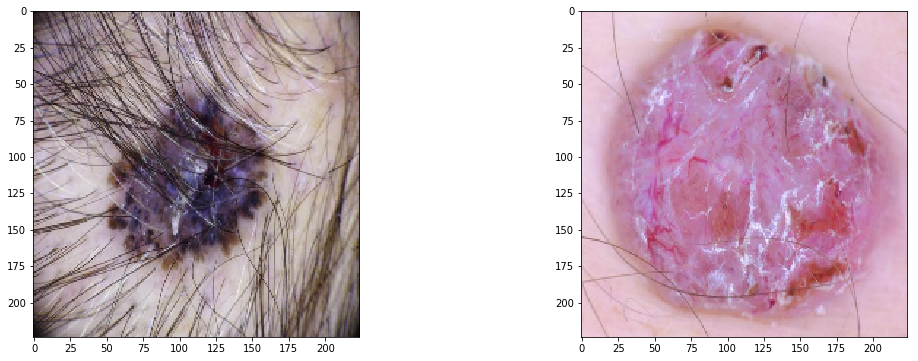

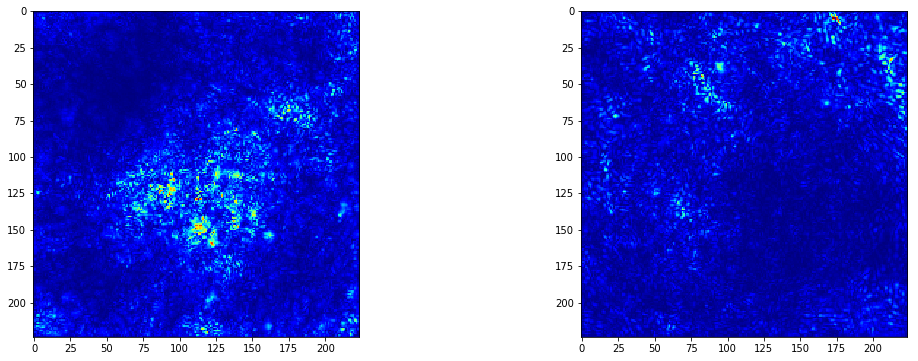

<Figure size 1296x432 with 0 Axes>

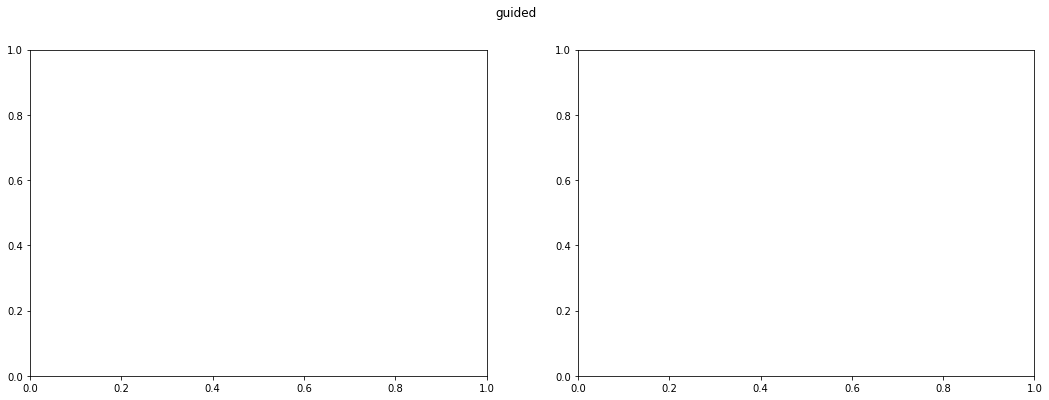

In [7]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
#%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20,verbose=True)
plt.imshow(img)

img1 = utils.load_img('df/hf_ISIC_0025584.jpg', target_size=(224, 224))
img2 = utils.load_img('df/hf_ISIC_0026439.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

from vis.visualization import visualize_saliency

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')
    
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
#         grads = visualize_saliency(model, layer_idx, filter_indices=20, 
#                                    seed_input=img, backprop_modifier=modifier)
        heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0,
                            seed_input=img, grad_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
ax[i].imshow(grads, cmap='jet')

In [28]:
for layer in model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [29]:
from vis.visualization import visualize_saliency
from vis.visualization import visualize_cam
from vis.utils import utils
from keras import activations


layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 0
idx=3

In [30]:
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier='relu')

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<Figure size 1440x1440 with 0 Axes>

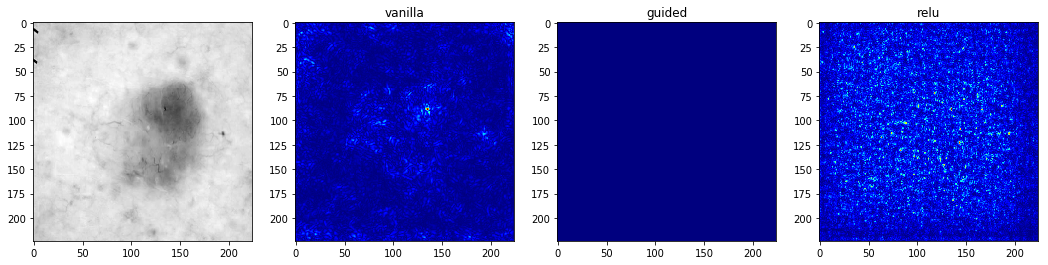

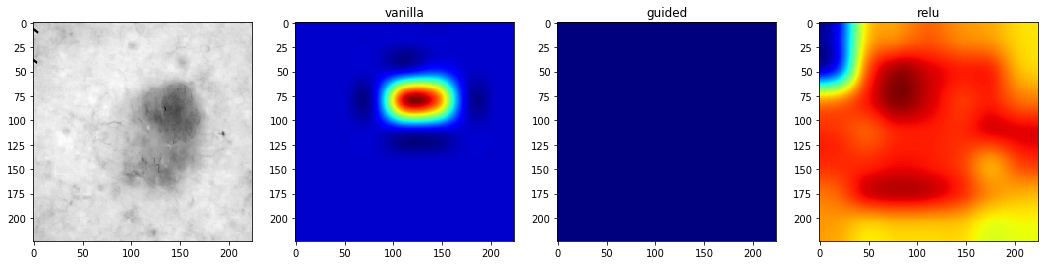

In [31]:
plt.figure(figsize=(20,20))

f, ax = plt.subplots(1, 4)
ax[0].imshow(X_train[idx][..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(X_train[idx][..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


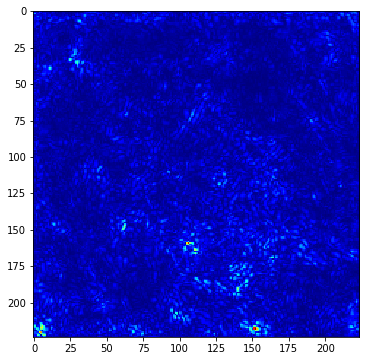

In [34]:
idx= 5
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


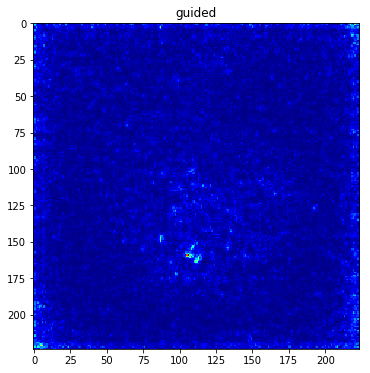

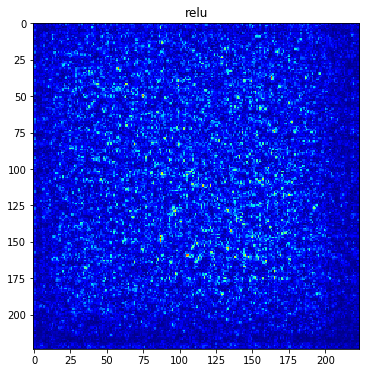

In [35]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=X_train[idx], backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

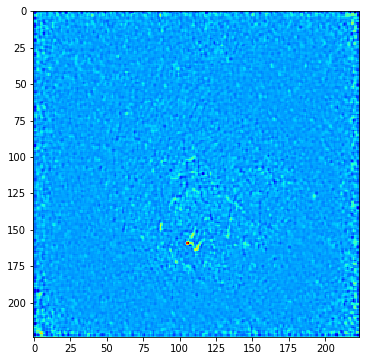

In [36]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx], 
                           backprop_modifier='guided', grad_modifier='negate')
plt.imshow(grads, cmap='jet')

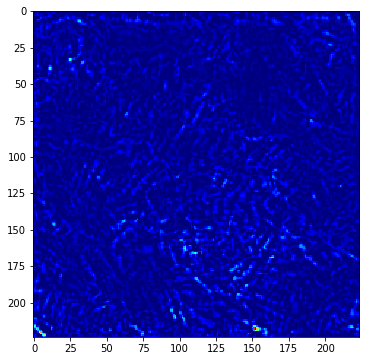

In [37]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx], 
                           backprop_modifier=None, grad_modifier="relu")
plt.imshow(grads, cmap='jet')

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


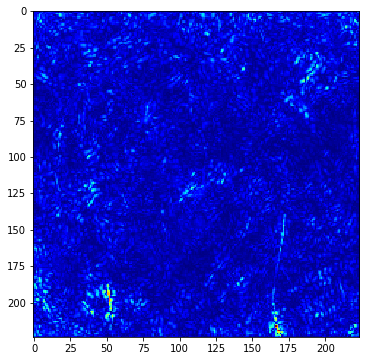

In [38]:
idx=8
class_idx = 20

from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

/home/sara/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


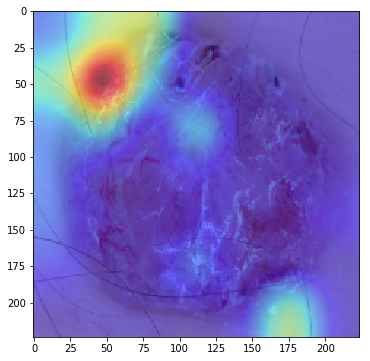

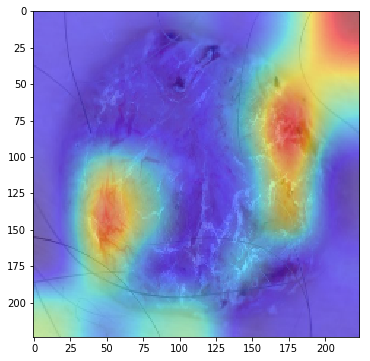

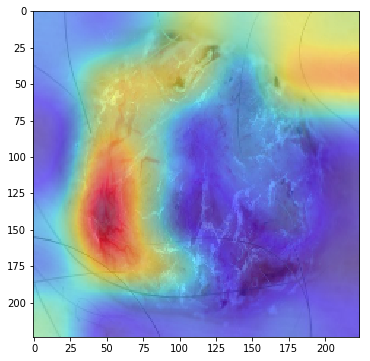

In [39]:
from vis.visualization import visualize_cam
from vis.visualization import visualize_saliency, overlay

img = utils.load_img('df/hf_ISIC_0026439.jpg', target_size=(224, 224))
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.5))

/home/sara/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


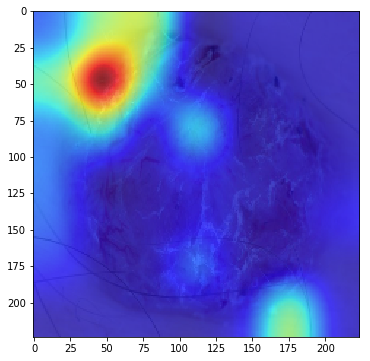

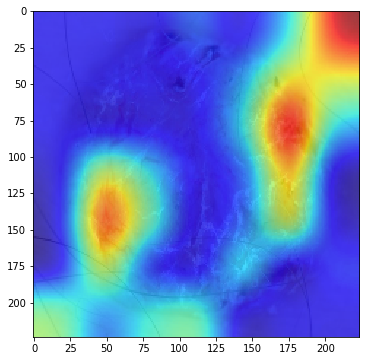

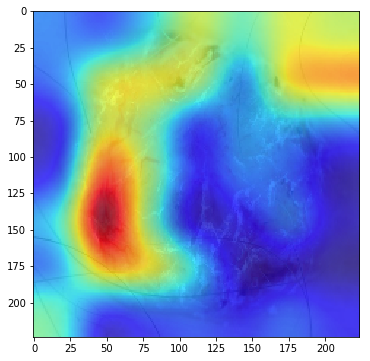

In [40]:
from vis.visualization import visualize_cam

img = utils.load_img('df/hf_ISIC_0026439.jpg', target_size=(224, 224))
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.3))

In [41]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 20, None, X_train[start_index + i])

(5, 224, 224, 3)


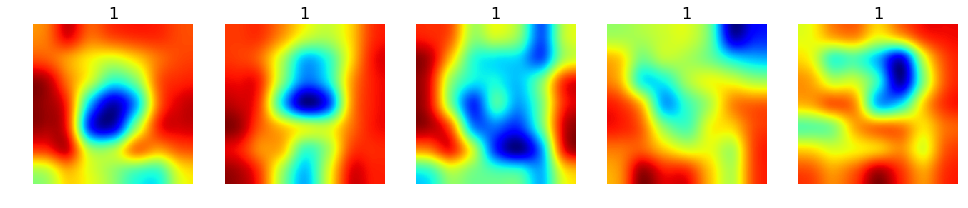

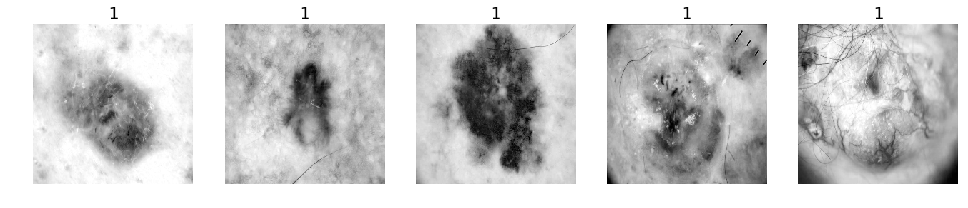

In [42]:
def plots(ims, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i][:, :, 0], cmap='gray')

def cplots(ims, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i][:, :, :])

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

(5, 224, 224, 3)


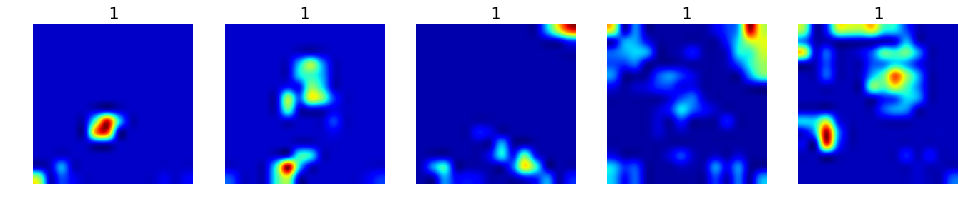

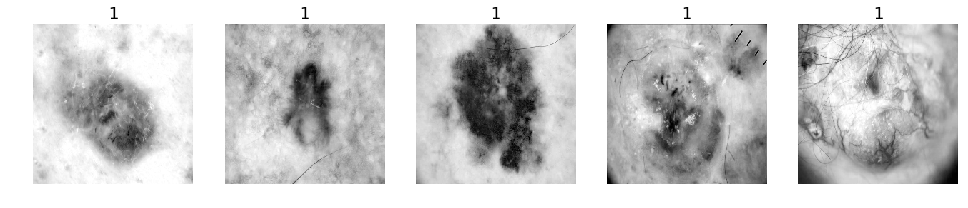

In [43]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 17, None, X_train[start_index + i])
    

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

(5, 224, 224, 3)


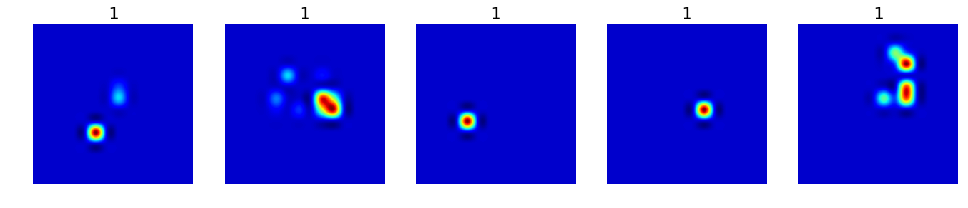

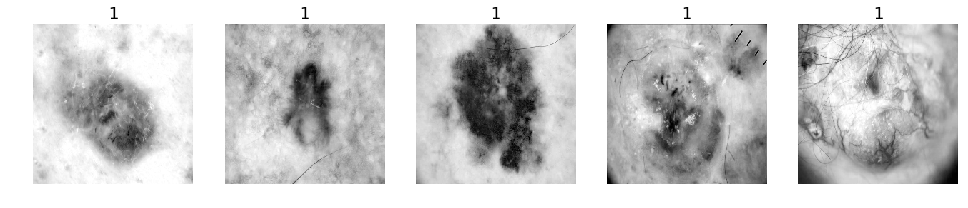

In [44]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 18, None, X_train[start_index + i])
    

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

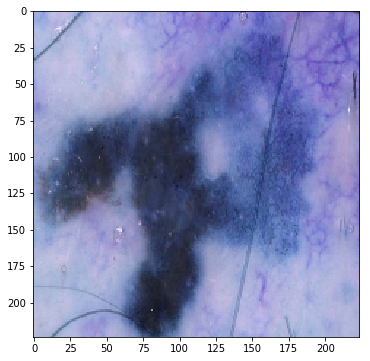

In [45]:
idx=18
plt.imshow(X_train[idx])

In [46]:
x = np.expand_dims(X_train[idx], axis=0)

In [47]:
model.predict(x, verbose=1)[0].argmax(axis=0)

1/1 [==============================] - 1s 514ms/step


669

In [48]:
y_train[idx]

1

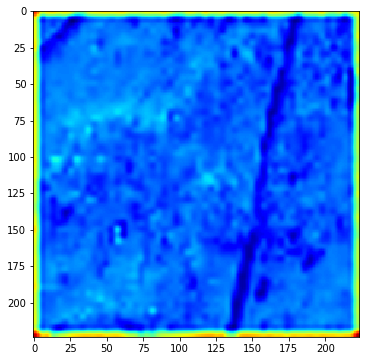

In [49]:
plt.imshow(visualize_cam(model=model, layer_idx=utils.find_layer_idx(model, 'block5_conv1'),
                         filter_indices=None, seed_input=np.asarray(X_train[idx]), 
                         penultimate_layer_idx=utils.find_layer_idx(model, 'block2_pool'),
                         backprop_modifier=None, grad_modifier=None))

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


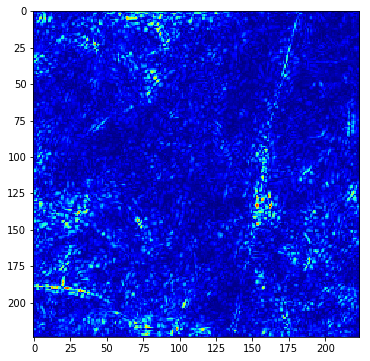

In [50]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


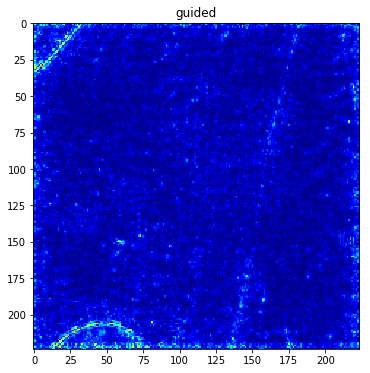

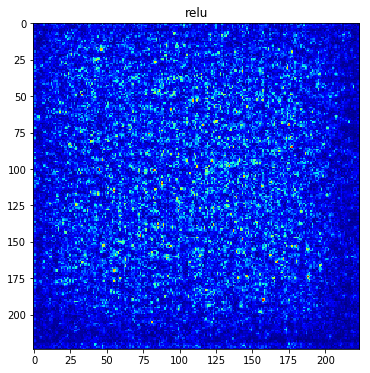

In [51]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=X_train[idx], backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

/home/sara/anaconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


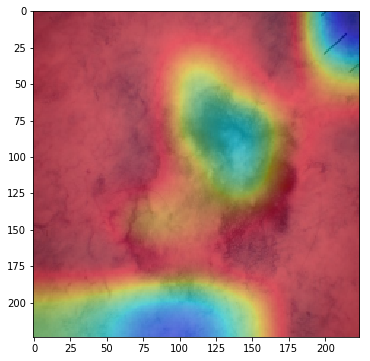

In [65]:
img = cv2.imread("df/hf_ISIC_0026916.jpg")
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

heatmap = visualize_cam(model, layer_idx, filter_indices = 80, seed_input=img)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)

attention_img = overlay(heatmap, img)
plt.imshow(attention_img)